# Assembling the HAFFA Logo

We have all the code needed to put together the basic logo. All we need to do is scale the parts and place them properly.

Doing this requires some close adjustments to properly position things. This is not easy to do with code, so I used Inkscape figure out where all of the components were located on the original image. Here are the results of those measurements:

In [36]:
canvas_box = [[0,912],[1075,5]]
letterH_box = [[0,911],[205,703]]
letterA1_box = [[205,911],[431,703]]
letterF1_box = [[474,911],[651,703]]
letterF2_box = [[686,911],[865,703]]
letterA2_box = [[851,911],[1075,703]]
pilot_box = [[582,833],[760,572]]
airplane_box = [[709,594],[991,377]]
heart_box = [[185,674],[820,5]]

These may need tweaking when we assemble the final file.

Next, we calculate the bounding box dimensions for each shape

In [37]:
def box(c):
    x1 = c[0][0]
    y1 = c[0][1]
    x2 = c[1][0]
    y2 = c[1][1]
    dx = x2 - x1
    dy = y1 - y2
    print(dx, dy)
    
print("canvas")
box(canvas_box)
print("H")
box(letterH_box)
print("A1")
box(letterA1_box)
print("A2")
box(letterA2_box)
print("F1")
box(letterF1_box)
print("F2")
box(letterF2_box)
print("Heart")
box(heart_box)
print("Pilot")
box(pilot_box)
print("Airplane")
box(airplane_box)

canvas
1075 907
H
205 208
A1
226 208
A2
224 208
F1
177 208
F2
179 208
Heart
635 669
Pilot
178 261
Airplane
282 217


While SVG does support merging multiple files into a single image, managing all those files would be a bit of a problem for users of the logo. It would be better is we assembled a single SVG file with all of the elements properly scaled and positioned. With the data above, we have the information needed to build a single file. Python tools will help.

First, here are the path definitions we have come up with so far:

In [38]:
++

There are many Python tools that can manipulate SVG data. Although it may not be the best around, I chose the **svgelements** library to perform some basic path manipulations. 

The first task I want to set up is to generate a simple normalzed display of each of the above component paths. I chose a height of 1000 as the standard size for each component. We will scale the objects as we work out the final placement.

Firat, we need to create a **Path** object for each shape. The bounding box can be extracted from this object.calculate the bounding box data for each of these paths.

In [39]:
from svgelements import Path, Matrix

path_a = Path(letter_a)
path_f = Path(letter_f)
path_h = Path(letter_h)
path_pilot = Path(pilot)
path_airplane = Path(airplane)
path_heart = Path(heart)

We can now generate a normalized version of each path, and display it for inspection.

We need a function that scales and translates each of these paths to our standard height. 
Here is our normailzing function:

In [40]:
def Normalize(path):
    box = path.bbox()
    x1,y1,x2,y2 = box
    dx = x2 - x1
    dy = y2 - y1
    scale = 1000 / dy
    t = "translate(%s,%s)" % (-x1,-y1)
    s = "scale(%s)" % scale
    tp = path * t
    sp = tp * s
    return sp

To see each shape and its bounding box, we set up a function that will generate an SVG file from the normailzed path:

In [41]:
def gen_svg(path,shape):
    box = path.bbox()
    fname = "_images/norm_%s.svg" % shape
    print(box)
    x1,y1,x2,y2 = box
    dx = x2 - x1 + 20
    dy = y2 - y1 + 20
    svg = """<svg
 xmlns="http://www.w3.org/2000/svg"
 width="%d" height="%d"
>""" %(dx,dy)
    p = path * "translate(10,10)"
    svg += """
    <path d="M 10,10 h %d v 1000 h -%d v -1000 Z" style="fill:none;stroke:black;stroke-width=3" />
    <path d="%s" />
</svg>
    """ % (dx-20,dx-20,p.d())
    with open(fname,"w") as fout:
        fout.write(svg)

Generate all the normalized shapes:

In [42]:
normalized_a = Normalize(path_a)
normalized_f = Normalize(path_f)
normalized_h = Normalize(path_h)
normalized_pilot = Normalize(path_pilot)
normalized_airplane = Normalize(path_airplane)
normalized_heart = Normalize(path_heart)

Before we assemble these shapes, we should look at the shapes:

(0.0, 0.0, 1125.012179020674, 1000.0)


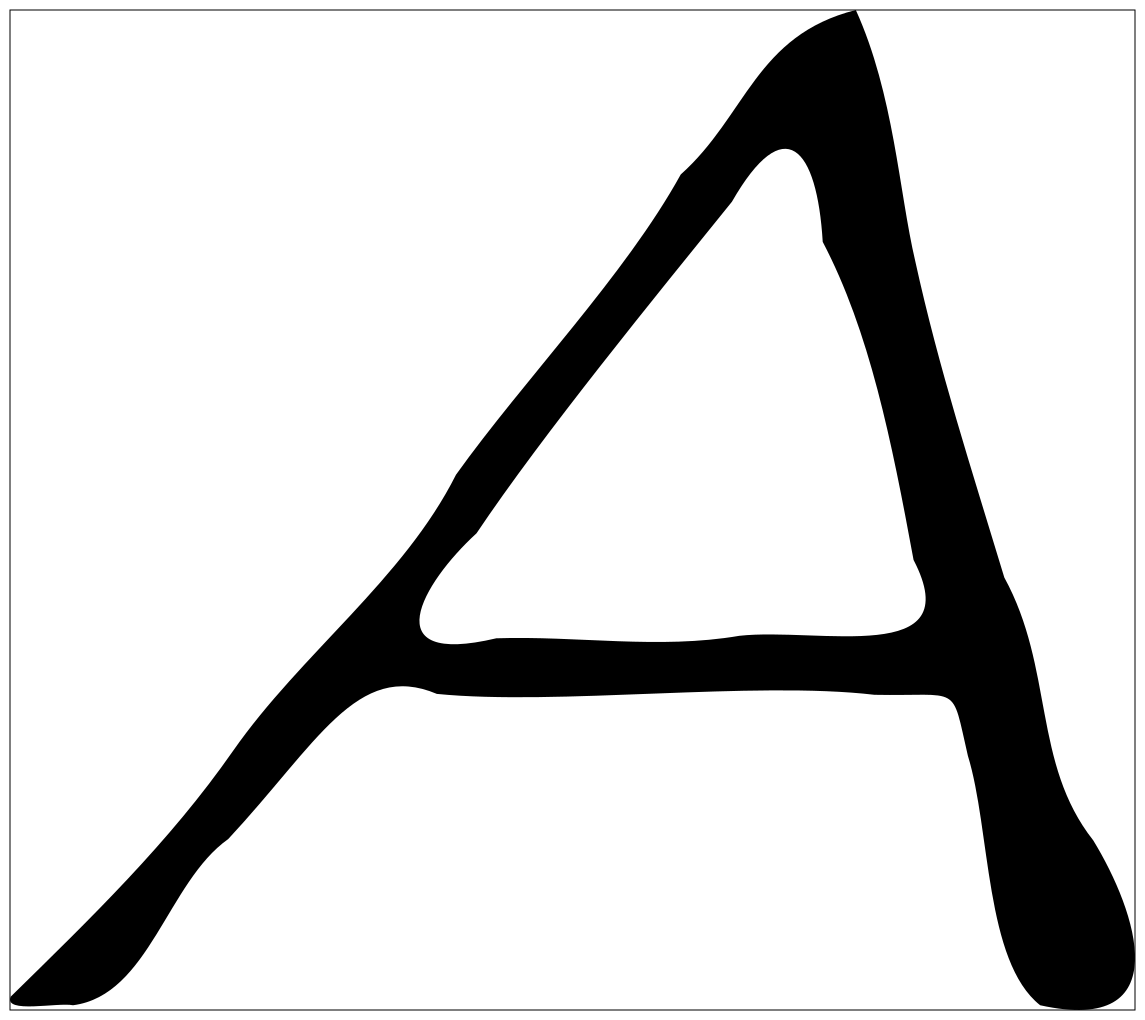

In [43]:
from IPython.core.display import SVG
gen_svg(normalized_a,"a")
SVG(filename="_images/norm_a.svg")

(0.0, 0.0, 1019.0508868846748, 999.9999999999999)


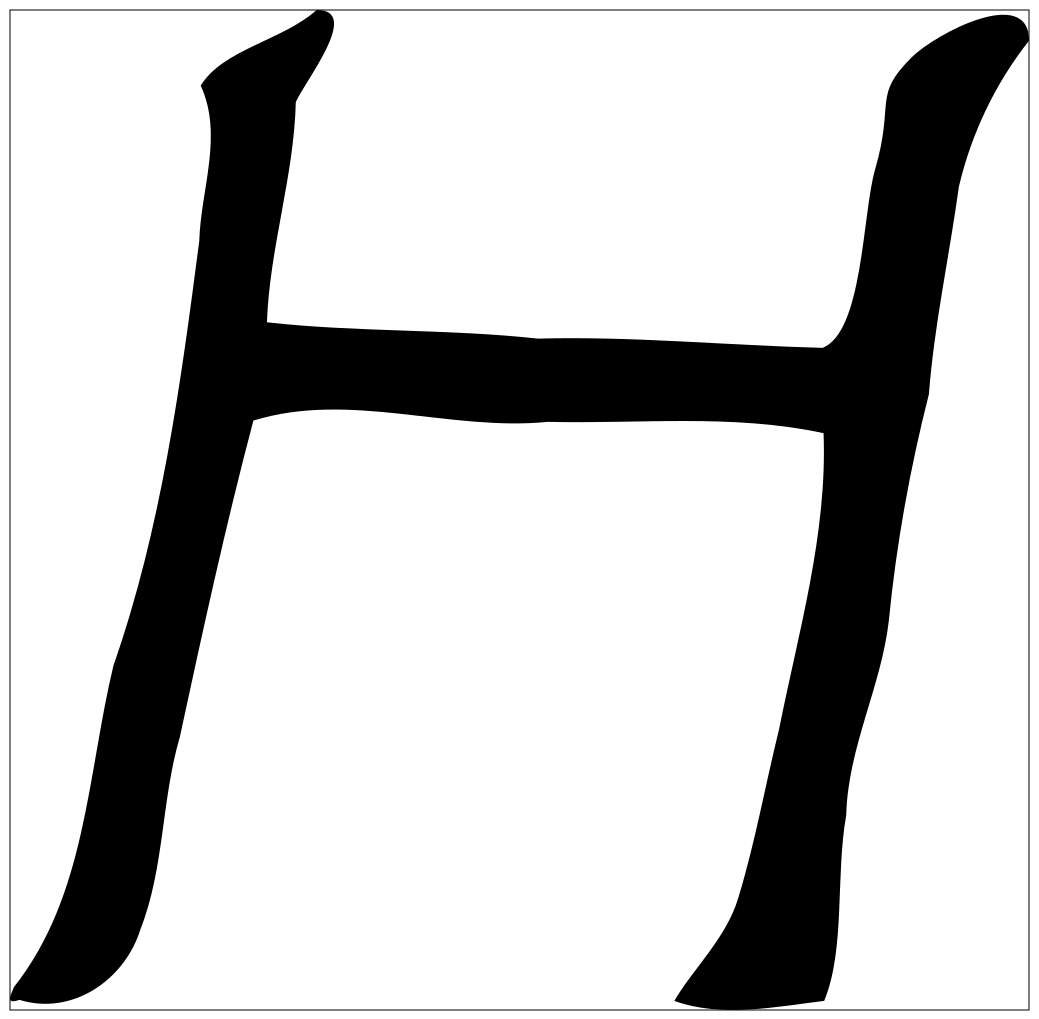

In [44]:
gen_svg(normalized_h,"h")
SVG(filename="_images/norm_h.svg")

With all of these calculations completed, we can now try to assemble the logo. For this first attempt, we will use the coordinates of the bounding boxes shown above for this experiment.

(0.0, 0.0, 902.3949926208384, 1000.0)


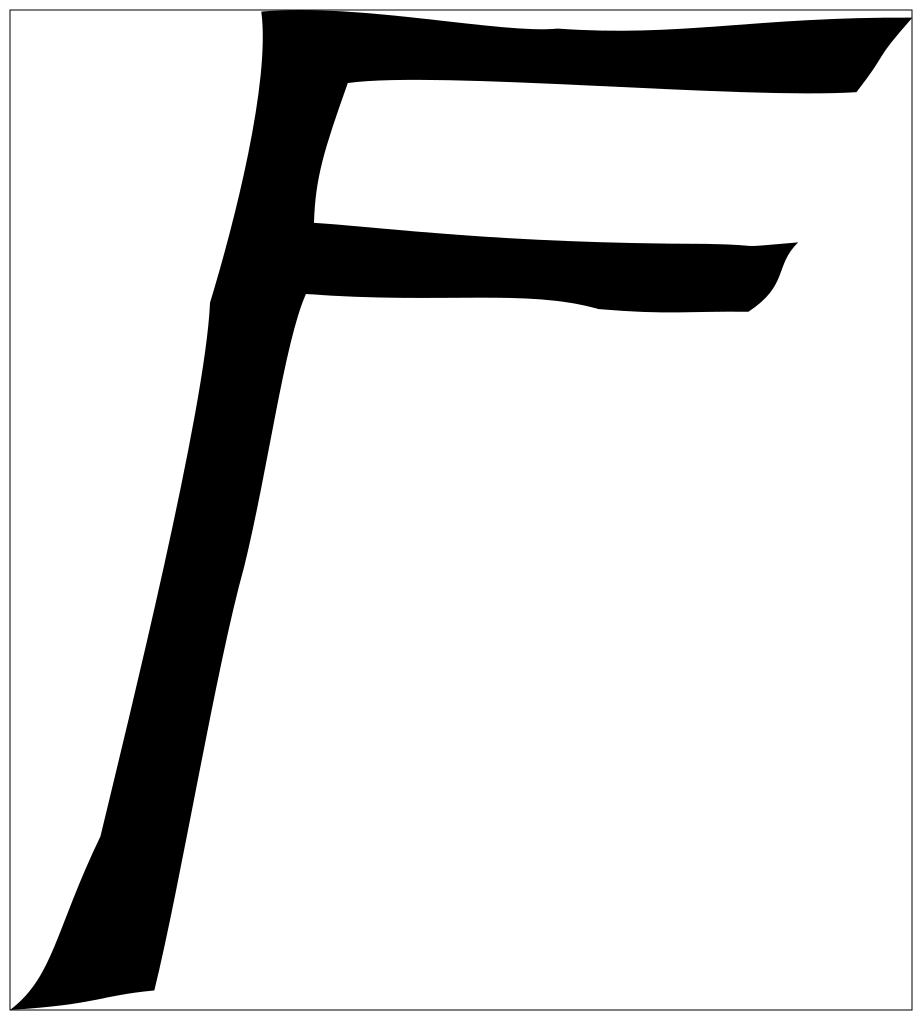

In [45]:
gen_svg(normalized_f,"f")
SVG(filename="_images/norm_f.svg")

(0.0, 0.0, 527.8249920140045, 1000.0)


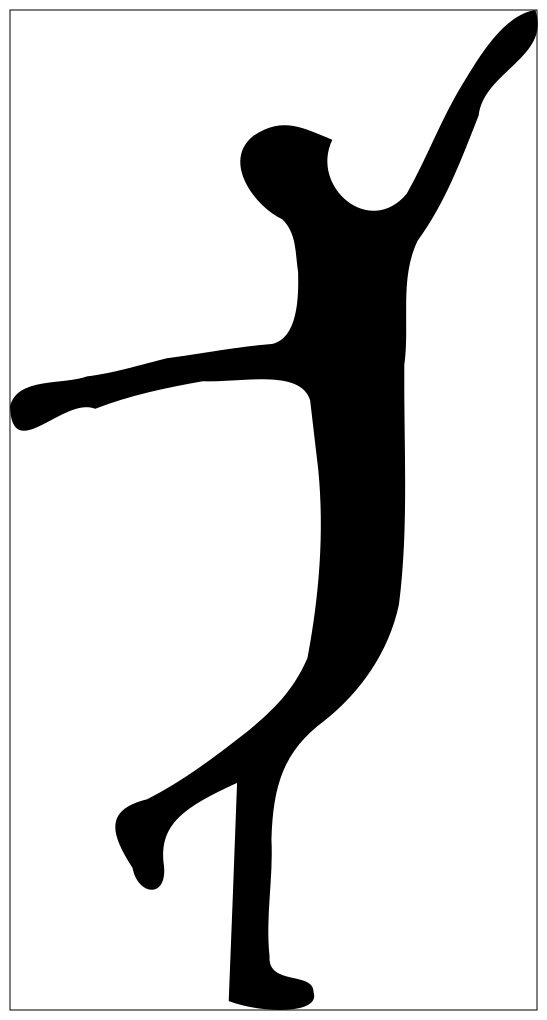

In [46]:
gen_svg(normalized_pilot,"pilot")
SVG(filename="_images/norm_pilot.svg")

(0.0, 0.0, 1245.302541851226, 1000.0)


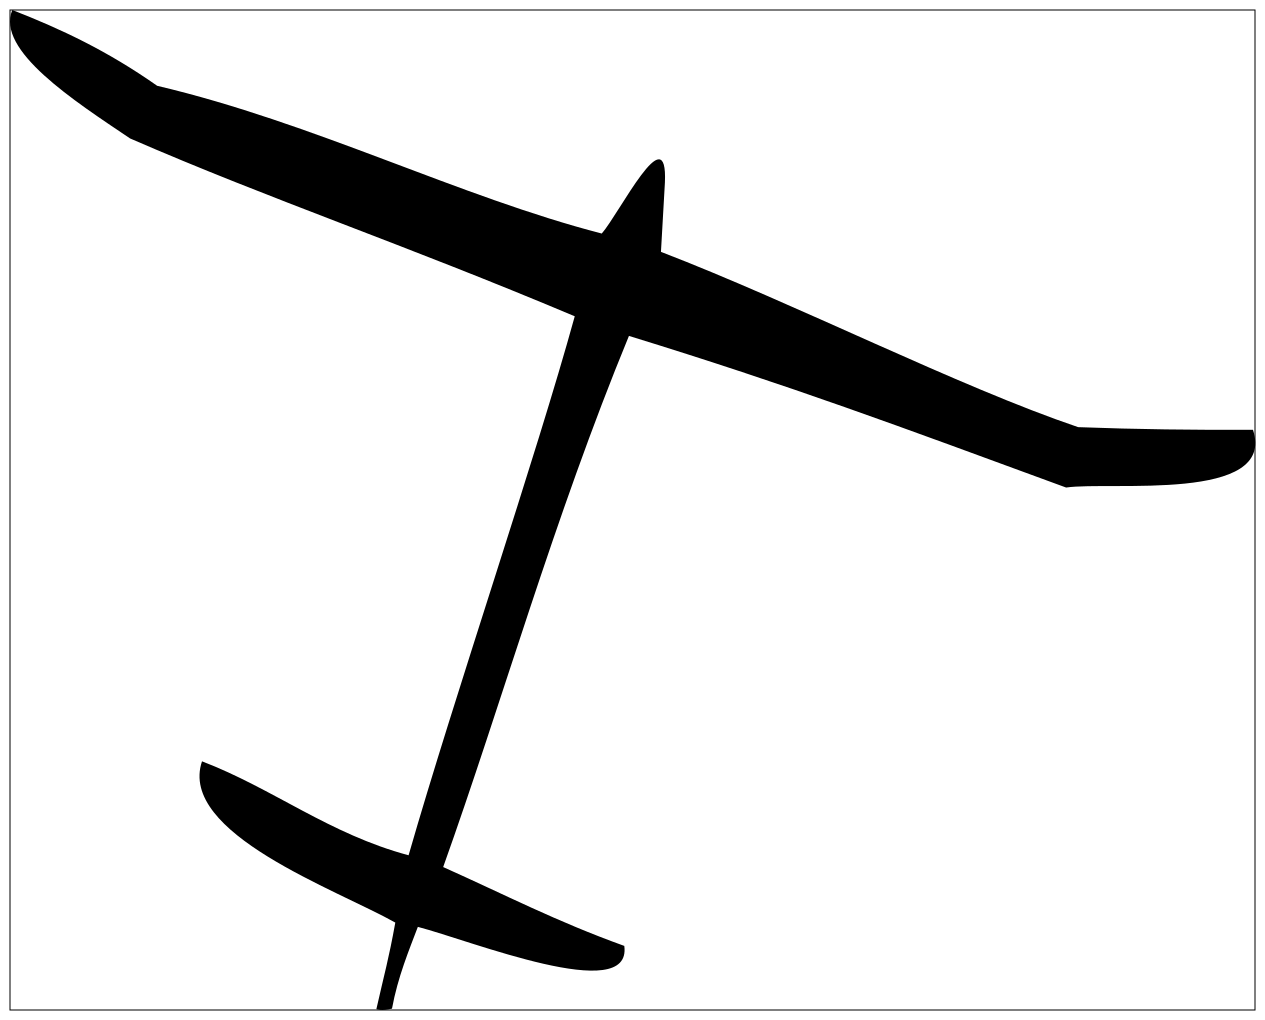

In [47]:
gen_svg(normalized_airplane,"airplane")
SVG(filename="_images/norm_airplane.svg")

(0.0, 0.0, 1093.836318148505, 1000.0)


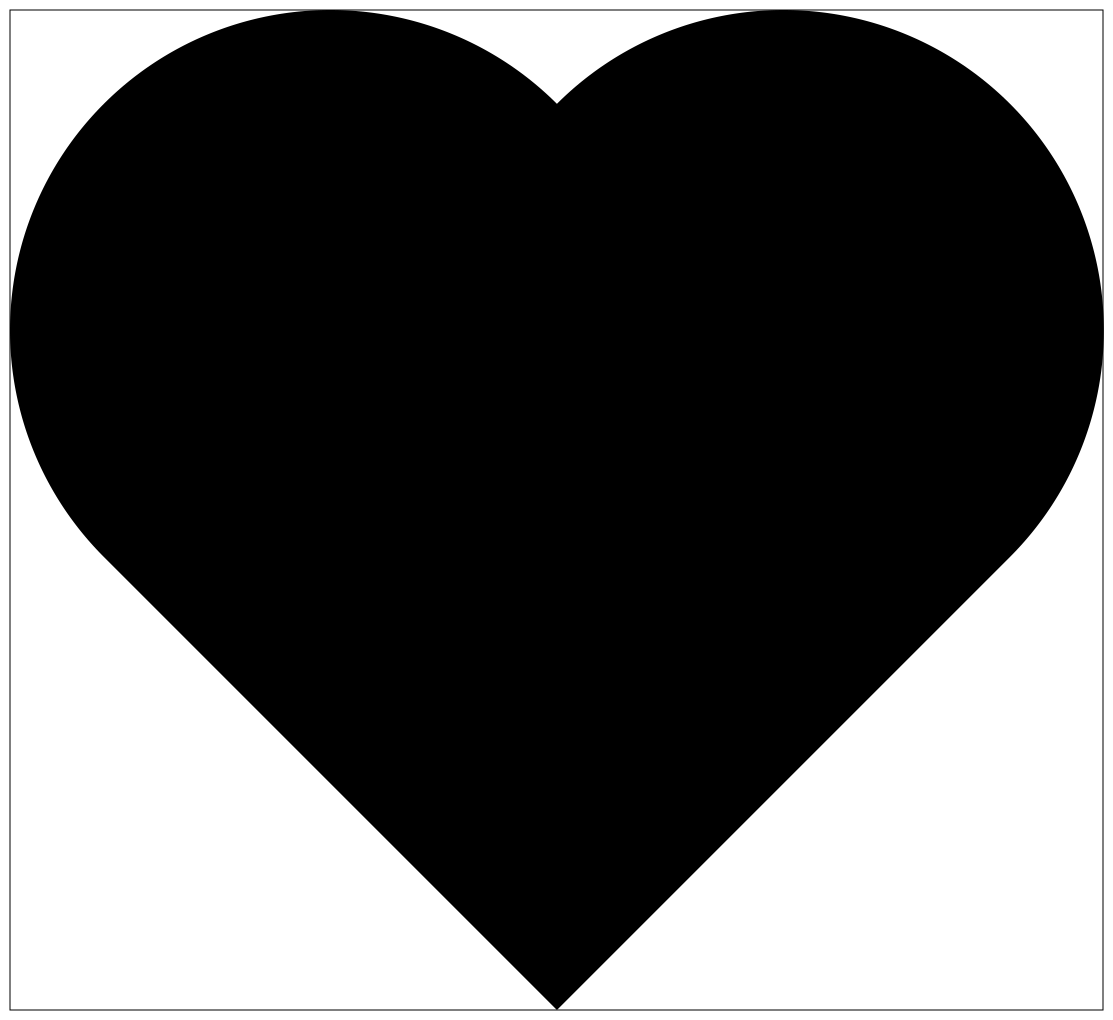

In [48]:
gen_svg(normalized_heart,"heart")
SVG(filename="_images/norm_heart.svg")

Now, place all these shapes and their associated bounding boxes in a list:

In [49]:
data = [
    [normalized_a, letterA1_box],
    [normalized_f, letterF1_box],
    [normalized_a, letterA2_box],
    [normalized_f, letterF2_box],
    [normalized_h, letterH_box],
    [normalized_pilot, pilot_box],
    [normalized_airplane, airplane_box],
    [normalized_heart, heart_box]]

In [50]:
def place(part):
    comp = part[0]
    box = part[1]
    x1 = box[0][0]
    y1 = box[0][1]
    x2 = box[1][0]
    y2 = box[1][1]
    dy = y1 - y2
    s = 'scale(%s)' % str(dy/1000)
    t = 'translate(%s,%s)' % (x1,y2)
    sc = comp * s
    tc = sc * t
    return tc

def build_logo(data):
    svg = """<svg
 xmlns="http://www.w3.org/2000/svg"
 width="1076" height="909"
>"""
    for part in data:
        sp = place(part)
        svg += """
<path d="%s" />
""" % sp.d()
    svg += "</svg>"
    with open("_images/test_logo2.svg","w") as fout:
        fout.write(svg)
    
build_logo(data)


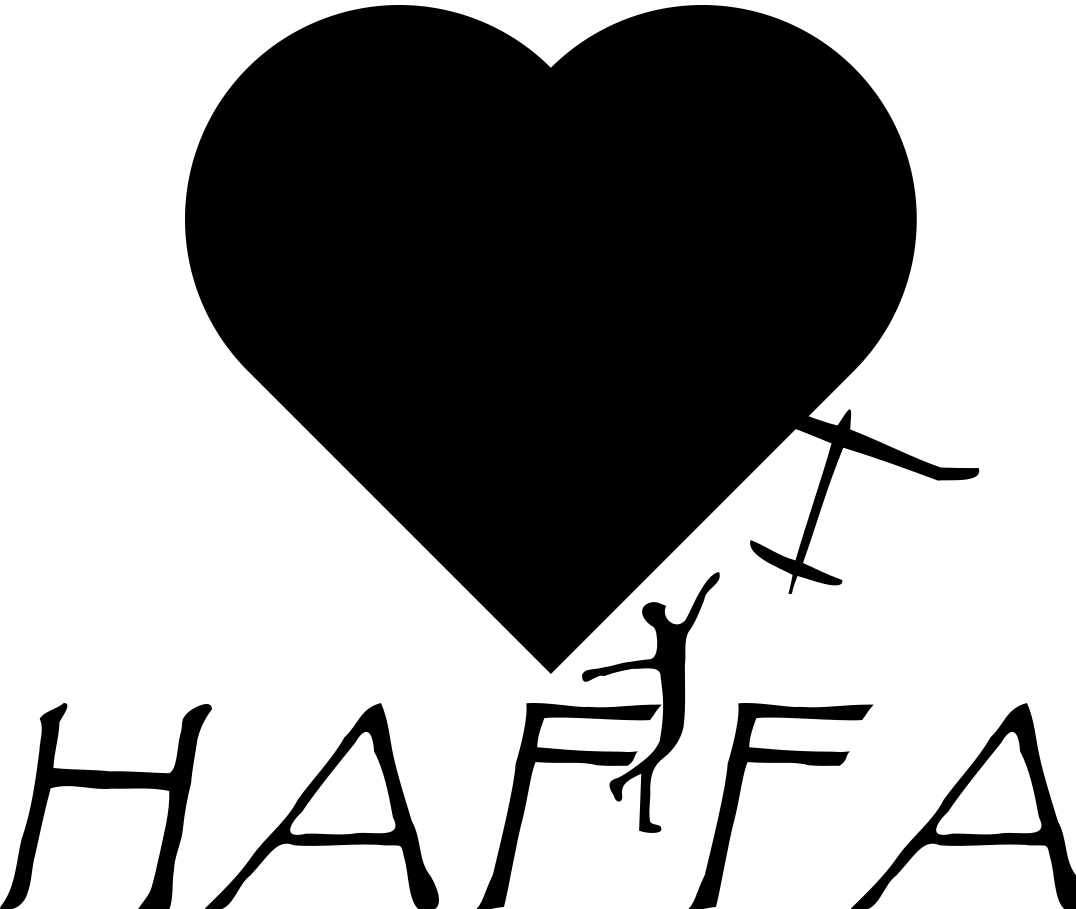

In [51]:
from IPython.core.display import SVG
SVG(filename='_images/test_logo2.svg')

This is close to correct, but a few adjustments are necessary. We will work on them when we add the flag to this image.

We need the bounding box for the heart to size the flag:

In [60]:
y1 = heart_box[0][1]
y2 = heart_box[1][1]
flag_height = y1 - y2
print(flag_height)

669


There is a simpler way to build the basic flag. ALl we need to do is build really thick lines.

In [70]:
stripe_width = flag_height / 13.0
flag_width = 1.9 * flag_height

svg = """<rect width=%d height=%d" style="fill:red" />""" % (flag_width, flag_height)
dy = 2 * stripe_width
sy = 1.5 * stripe_width
svg += """
<path style="stroke-width="%d" d="M 0,%d H %d """ % (stripe_width, sy, flag_width)
svg += """v %d H 0 v %d h %d """ % (dy, sy, flag_width)
svg += """v %d H 0 v %d h %d """ % (dy, sy, flag_width)
svg += """v %d H 0 v %d h %d />""" % (dy, sy, flag_width)
print(svg) 

<rect width=1271 height=669" style="fill:red" />
<path style="stroke-width="51" d="M 0,77 H 1271 v 102 H 0 v 77 h 1271 v 102 H 0 v 77 h 1271 v 102 H 0 v 77 h 1271 />
